In [1]:
! pip install geopandas matplotlib


ERROR: Could not find an activated virtualenv (required).


/var/folders/88/v5lhf14x1r5bv01kg4dwr5780000gn/T/ipykernel_10273/683746161.py:9: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


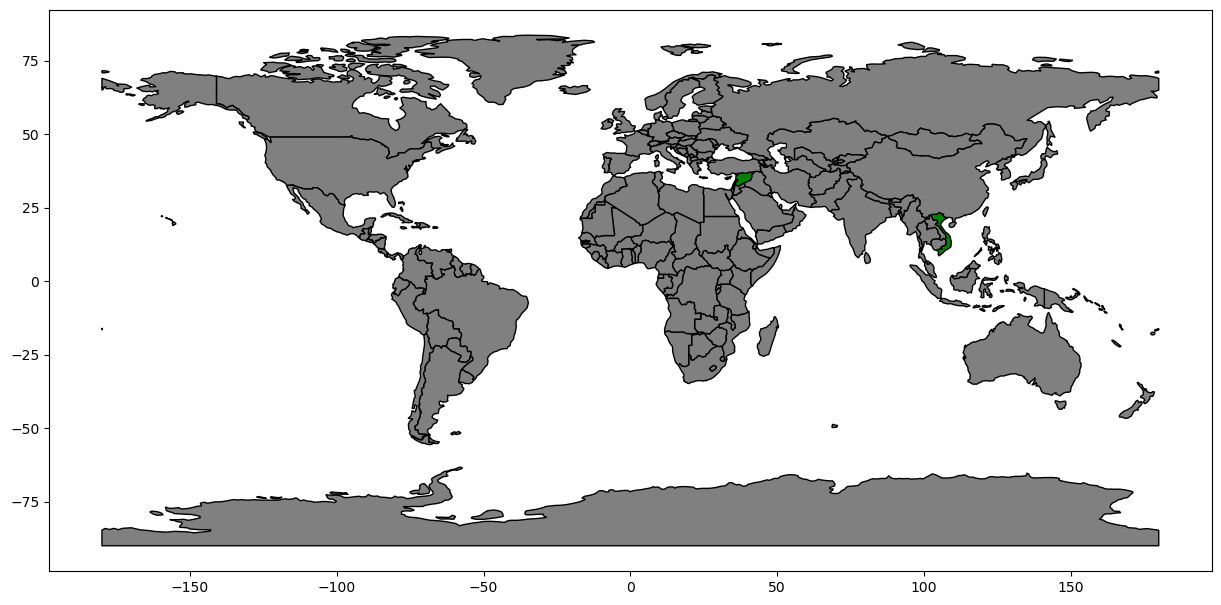

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# 加载数据
df = pd.read_csv('dyadic with ratio.csv')

# 读取GeoJSON文件
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# 使'iso_a3'成为索引，这样我们可以直接使用它来匹配数据
world.set_index('iso_a3', inplace=True)

# 用于存储每个国家的颜色
colors = {}

# 填充颜色
for country_code in world.index:
    country_name = world.loc[country_code, 'name']
    if country_name in df['Country A'].values:
        if df[df['Country A'] == country_name]['War or not'].iloc[0] == 1:
            colors[country_code] = 'red'
        else:
            colors[country_code] = 'green'
    else:
        colors[country_code] = 'grey'

# 绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# 使用 colors 字典为每个国家指定颜色
world['color'] = world.index.map(colors)

# 使用颜色映射来填充国家几何形状
world.plot(ax=ax, color=world['color'], edgecolor='black')

plt.show()


In [3]:
# 查找存在于 df 但不在 world 中的国家
missing_in_world = df[~df['Country A'].isin(world['name'])]['Country A'].unique()

# 查找存在于 world 但不在 df 中的国家
missing_in_df = world[~world['name'].isin(df['Country A'])]['name'].unique()

print("Countries in df but not in world dataset:", missing_in_world)
print("Countries in world dataset but not in df:", missing_in_df)


Countries in df but not in world dataset: ['Afghanistan ' 'Algeria ' 'Argentina ' 'Australia ' 'Austria ' 'Belgium '
 'Benin ' 'Bolivia ' 'Brazil ' 'Burkina Faso ' 'Burundi ' 'Cameroon '
 'Canada ' 'Chile ' 'Colombia ' 'Congo '
 'Democratic Republic of the Congo ' 'Denmark ' 'Dominican Republic '
 'Ecuador ' 'Egypt ' 'El Salvador ' 'Ethiopia ' 'Fiji ' 'Finland '
 'France ' 'Gabon ' 'Germany ' 'Ghana ' 'Greece ' 'Guatemala ' 'Honduras '
 'Hungary ' 'India ' 'Iran ' 'Iraq ' 'Ireland ' 'Israel ' 'Italy '
 'Ivory Coast ' 'Japan ' 'Jordan ' 'Kenya ' 'Kuwait ' 'Lebanon '
 'Liberia ' 'Libya ' 'Luxembourg ' 'Madagascar ' 'Malawi ' 'Malaysia '
 'Mali ' 'Mauritius ' 'Mexico ' 'Morocco ' 'Myanmar ' 'Nepal '
 'Netherlands ' 'New Zealand ' 'Nicaragua ' 'Nigeria ' 'Norway '
 'Pakistan ' 'Paraguay ' 'Peru ' 'Philippines ' 'Portugal '
 'Saudi Arabia ' 'Sierra Leone ' 'Singapore ' 'Somalia ' 'South Africa '
 'South Korea ' 'Spain ' 'Sri Lanka ' 'Sudan ' 'Sweden ' 'Switzerland '
 'Tanzania ' 'Thailand '

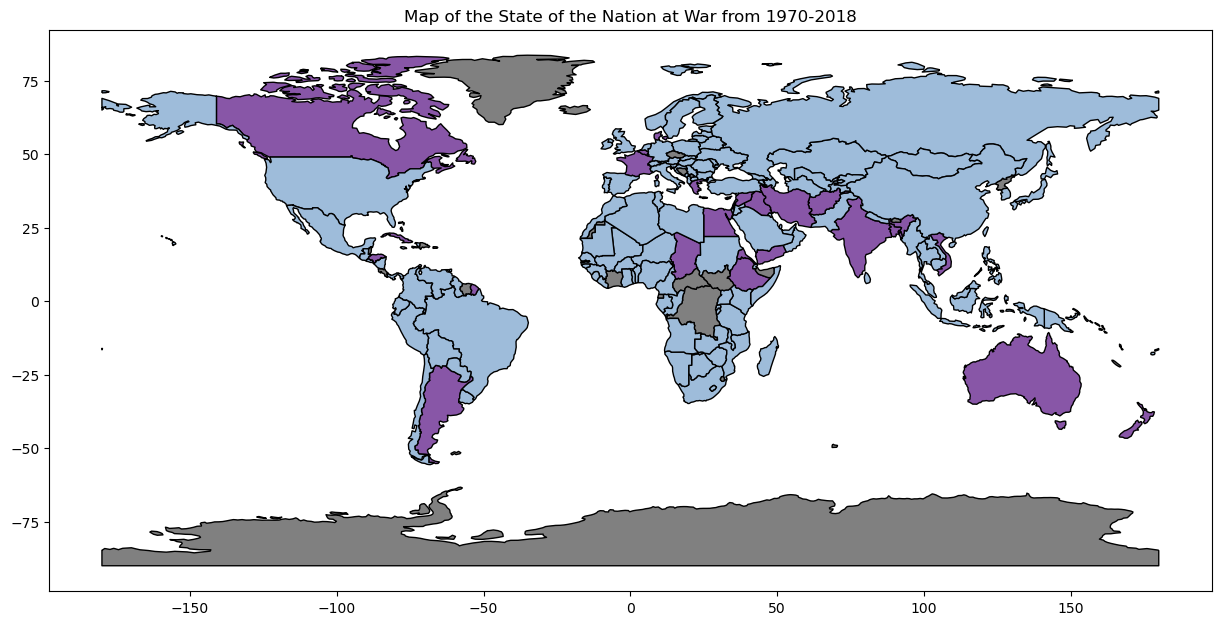

In [4]:
# 1. 去掉 df 中的国家名称末尾的空格
df['Country A'] = df['Country A'].str.strip()

# 2. 重新进行颜色填充
colors = {}

for country_code in world.index:
    country_name = world.loc[country_code, 'name']
    if country_name in df['Country A'].values:
        for country_code in world.index:
            country_name = world.loc[country_code, 'name']
            country_df = df[df['Country A'] == country_name]
            if country_name in df['Country A'].values:
                if any(country_df['War or not'] == 1):
                    colors[country_code] = '#8856a7'
                else:
                    colors[country_code] = '#9ebcda'
            else:
                colors[country_code] = 'grey'

        else:
            colors[country_code] = 'green'
    else:
        colors[country_code] = 'grey'

# 3. 重新绘制地图
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
world['color'] = world.index.map(colors)
world.plot(ax=ax, color=world['color'], edgecolor='black')
ax.set_title("Map of the State of the Nation at War from 1970-2018")
plt.show()


In [26]:
war_countries_df = df[df['War or not'] == 1]
war_colors = {country: colors[world[world['name'] == country].index[0]] for country in war_countries_df['Country A'] if country in world['name'].values}

# 输出与“War or not”为1的国家相关的颜色
war_colors

{'India': 'red',
 'Egypt': 'red',
 'Ethiopia': 'red',
 'Iran': 'red',
 'Chad': 'red',
 'Iraq': 'red',
 'Argentina': 'red',
 'Australia': 'red',
 'Bangladesh': 'red',
 'Belgium': 'red',
 'Canada': 'red',
 'Denmark': 'red',
 'France': 'red',
 'Greece': 'red',
 'Honduras': 'red',
 'Eritrea': 'red',
 'Afghanistan': 'red',
 'Syria': 'red',
 'New Zealand': 'red',
 'Cyprus': 'red',
 'Cuba': 'red',
 'Yemen': 'red',
 'Vietnam': 'red'}